In [1]:
import os
import sys

import numpy as np
import skimage
from skimage import io

from distance_transform import *

ANISOTROPY_I3 = (20, 5, 5)
ANISOTROPY_LW4 = (15, 7.5, 7.5)
NORMALIZE = normalize_tanh
NORMALIZE_SCALE = 20

PATH_IN_I3 = "/home/cyril/Documents/Data/I3/"
PATH_IN_LW4 = "/home/cyril/Documents/Data/LW4/"
PATH_OUT = "/HDD1/data/IGBMC_Small/"

In [2]:
image_i3 = skimage.io.imread(PATH_IN_I3 + "i3.tif")
label_i3_1 = np.array(skimage.io.imread(PATH_IN_I3 + "Labels_i3-mitos_1-500.tif"))
label_i3_2 = np.array(skimage.io.imread(PATH_IN_I3 + "Labels_i3_Reticulum_172-251.tif"))

In [3]:
image_lw4 = skimage.io.imread(PATH_IN_LW4 + "LW4-600.tif")
label_lw4_1 = np.array(skimage.io.imread(PATH_IN_LW4 + "Labels_LW4-600_All-Step40_mito.tif"))
label_lw4_2 = np.array(skimage.io.imread(PATH_IN_LW4 + "Labels_LW4-600_1-40_81-120_Reti.tif"))

In [4]:
# preselection
image_i3 = image_i3[0:300]
label_i3_1 = label_i3_1 [0:300]
label_i3_2 = label_i3_2[0:300]

image_lw4 = image_lw4[0:300]
label_lw4_1 = label_lw4_1[0:300]
label_lw4_2 = label_lw4_2[0:300]

In [5]:
# Normalize
def normalize(image):
    image_min = image.min()
    image_max = image.max()
    image_normalized_f32 = np.array((image - image_min) / (image_max - image_min)).astype(np.float32)

    if image_normalized_f32.min() != 0 or image_normalized_f32.max() != 1:
        print("ERROR, INVALID NORMALIZATION")
    return image_normalized_f32

image_i3 = normalize(image_i3)
image_lw4 = normalize(image_lw4)

In [6]:
# Label binarization
label_i3_1 = ((label_i3_1 > 0)*1.0).astype(np.uint8)
label_i3_2 = ((label_i3_2 > 0)*1.0).astype(np.uint8)
label_lw4_1 = ((label_lw4_1 > 0)*1.0).astype(np.uint8)
label_lw4_2 = ((label_lw4_2 > 0)*1.0).astype(np.uint8)

In [7]:
# Distance transform label
label_i3_1_dt = label_dt_f16(label_i3_1.astype(np.float32), ANISOTROPY_I3, NORMALIZE, NORMALIZE_SCALE, NORMALIZE_SCALE)
label_i3_2_dt = label_dt_f16(label_i3_2.astype(np.float32), ANISOTROPY_I3, NORMALIZE, NORMALIZE_SCALE, NORMALIZE_SCALE)
label_lw4_1_dt = label_dt_f16(label_lw4_1.astype(np.float32), ANISOTROPY_LW4, NORMALIZE, NORMALIZE_SCALE, NORMALIZE_SCALE)
label_lw4_2_dt = label_dt_f16(label_lw4_2.astype(np.float32), ANISOTROPY_LW4, NORMALIZE, NORMALIZE_SCALE, NORMALIZE_SCALE)

In [8]:
# I3 selection for reticulum and multi
image_i3_multi = image_i3[171:251, 150:150+1280, 850:850+1536]
label_i3_1_multi = label_i3_1[171:251, 150:150+1280, 850:850+1536]
label_i3_2_multi = label_i3_2[171:251, 150:150+1280, 850:850+1536]
label_i3_1_dt_multi = label_i3_1_dt[171:251, 150:150+1280, 850:850+1536]
label_i3_2_dt_multi = label_i3_2_dt[171:251, 150:150+1280, 850:850+1536]
# I3 selection for mitochondria
# image_i3_bin_1 = image_i3[0:300, 150:150+1280, 850:850+1536]
# label_i3_bin_1 = label_i3_1[0:300, 150:150+1280, 850:850+1536]

In [9]:
# LW4 selection for reticulum and multi
image_lw4_multi = np.concatenate([image_lw4[0:40, 50:50+1024, 250:1536], image_lw4[80:80+40, 50:50+1024, 250:1536]], axis=0)
label_lw4_1_multi = np.concatenate([label_lw4_1[0:40, 50:50+1024, 250:1536], label_lw4_1[80:80+40, 50:50+1024, 250:1536]], axis=0)
label_lw4_2_multi = np.concatenate([label_lw4_2[0:40, 50:50+1024, 250:1536], label_lw4_2[80:80+40, 50:50+1024, 250:1536]], axis=0)
label_lw4_1_dt_multi = np.concatenate([label_lw4_1_dt[0:40, 50:50+1024, 250:1536], label_lw4_1_dt[80:80+40, 50:50+1024, 250:1536]], axis=0)
label_lw4_2_dt_multi = np.concatenate([label_lw4_2_dt[0:40, 50:50+1024, 250:1536], label_lw4_2_dt[80:80+40, 50:50+1024, 250:1536]], axis=0)

In [10]:
np.save(PATH_OUT + "I3_MULTI_IMAGE.npy", image_i3_multi)
np.save(PATH_OUT + "I3_MULTI_LABEL_MITO.npy", label_i3_1_multi)
np.save(PATH_OUT + "I3_MULTI_LABEL_RETI.npy", label_i3_2_multi)
np.save(PATH_OUT + "I3_MULTI_LABEL_MITO_DT.npy", label_i3_1_dt_multi)
np.save(PATH_OUT + "I3_MULTI_LABEL_RETI_DT.npy", label_i3_2_dt_multi)

In [11]:
np.save(PATH_OUT + "LW4_MULTI_IMAGE.npy", image_lw4_multi)
np.save(PATH_OUT + "LW4_MULTI_LABEL_MITO.npy", label_lw4_1_multi)
np.save(PATH_OUT + "LW4_MULTI_LABEL_RETI.npy", label_lw4_2_multi)
np.save(PATH_OUT + "LW4_MULTI_LABEL_MITO_DT.npy", label_lw4_1_dt_multi)
np.save(PATH_OUT + "LW4_MULTI_LABEL_RETI_DT.npy", label_lw4_2_dt_multi)

In [12]:
# visualization
import matplotlib.pyplot as plt

In [13]:
print(image_i3_multi.shape)
print(image_lw4_multi.shape)

(80, 1280, 1536)
(80, 1024, 1286)


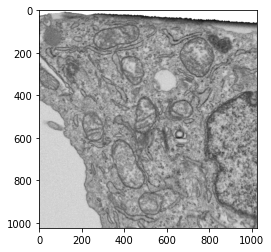

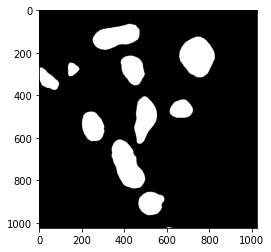

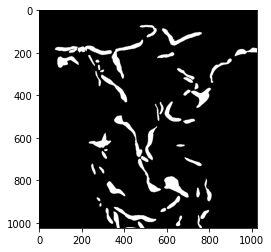

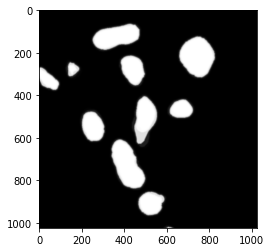

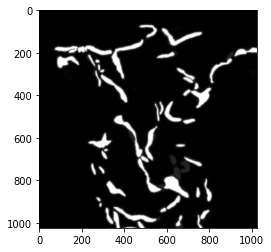

In [14]:
plt.imshow(image_i3_multi[0, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_i3_1_multi[0, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_i3_2_multi[0, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_i3_1_dt_multi[0, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()
plt.imshow(label_i3_2_dt_multi[0, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()

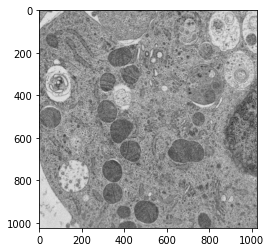

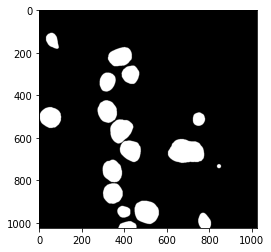

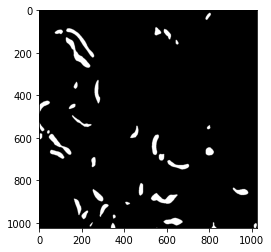

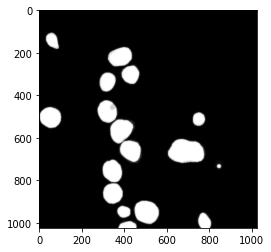

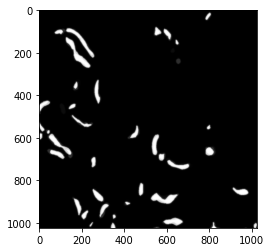

In [15]:
plt.imshow(image_lw4_multi[0, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_lw4_1_multi[0, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_lw4_2_multi[0, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_lw4_1_dt_multi[0, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()
plt.imshow(label_lw4_2_dt_multi[0, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()

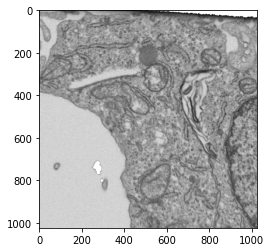

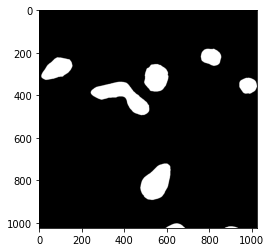

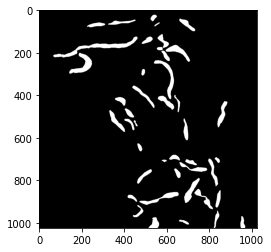

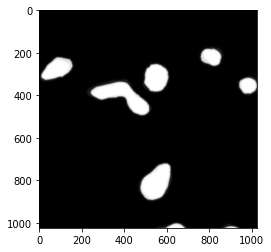

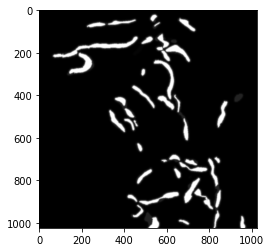

In [17]:
plt.imshow(image_i3_multi[79, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_i3_1_multi[79, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_i3_2_multi[79, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_i3_1_dt_multi[79, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()
plt.imshow(label_i3_2_dt_multi[79, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()

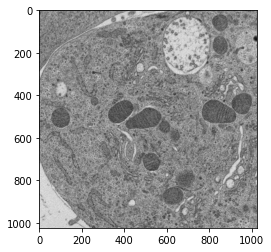

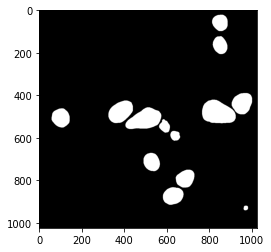

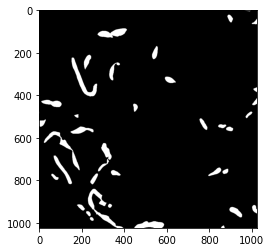

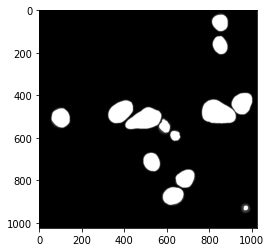

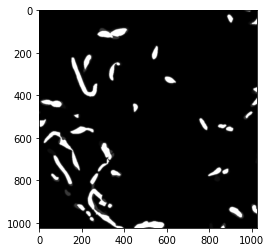

In [18]:
plt.imshow(image_lw4_multi[79, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_lw4_1_multi[79, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_lw4_2_multi[79, 0:1024, 0:1024], cmap="gray")
plt.show()
plt.imshow(label_lw4_1_dt_multi[79, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()
plt.imshow(label_lw4_2_dt_multi[79, 0:1024, 0:1024].astype(np.float32), cmap="gray")
plt.show()